# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
import numpy as np

## imports for Python, Pandas

In [28]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [29]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [30]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [31]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [32]:
cd ~

C:\Users\Jai Dave


In [33]:
cd Documents\Springboard\Mini-Projects\JSON Mini_Project\Json_Mini_Project\data_wrangling_json\data_wrangling_json

C:\Users\Jai Dave\Documents\Springboard\Mini-Projects\JSON Mini_Project\Json_Mini_Project\data_wrangling_json\data_wrangling_json


In [34]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [35]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

#### Load the World Bank Dataset and examine the data

In [36]:
json_data = json.load((open('data/world_bank_projects.json')))

In [37]:
json_df = pd.read_json('data/world_bank_projects.json')

In [38]:
json_df.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


In [39]:
json_df.tail()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
495,{'$oid': '52b213b38594d8a2be17c96f'},2013,August,2012-08-10T00:00:00Z,THE COMPETITIVENESS COMPANY,2013-08-31T00:00:00Z,Jamaica!$!JM,JM,Jamaica,Jamaica,...,"EV,AZ",IBRD,Closed,N,"{'Percent': 50, 'Name': 'Regulation and compet...","[{'code': '40', 'name': 'Regulation and compet...","62,40",0,50000,http://www.worldbank.org/projects/P127299/tech...
496,{'$oid': '52b213b38594d8a2be17c970'},2013,August,2012-08-09T00:00:00Z,LAO PEOPLES DEMOCRATIC REPUBLIC,2012-12-31T00:00:00Z,Lao People's Democratic Republic!$!LA,LA,Lao People's Democratic Republic,Lao People's Democratic Republic,...,"YZ,JA,EZ,FZ,BC",IBRD,Closed,N,"{'Percent': 14, 'Name': 'Child health'}","[{'code': '63', 'name': 'Child health'}, {'cod...","65,27,49,63",20000000,20000000,http://www.worldbank.org/projects/P125298/lao-...
497,{'$oid': '52b213b38594d8a2be17c971'},2013,August,2012-08-03T00:00:00Z,GOVERNMENT OF THE REPUBLIC OF GUINEA,2014-12-31T00:00:00Z,Republic of Guinea!$!GN,GN,Republic of Guinea,Guinea,...,"AB,AH,AI",IBRD,Active,N,"{'Percent': 100, 'Name': 'Global food crisis r...","[{'code': '91', 'name': 'Global food crisis re...",91,0,20000000,http://www.worldbank.org/projects/P128309/seco...
498,{'$oid': '52b213b38594d8a2be17c972'},2013,August,2012-08-02T00:00:00Z,REPUBLIC OF INDONESIA,2017-09-30T00:00:00Z,Republic of Indonesia!$!ID,ID,Republic of Indonesia,Indonesia,...,"YA,BL,AB",IBRD,Active,N,"{'Percent': 85, 'Name': 'Rural services and in...","[{'code': '78', 'name': 'Rural services and in...","77,91,78",80000000,80000000,http://www.worldbank.org/projects/P117243/sust...
499,{'$oid': '52b213b38594d8a2be17c973'},2013,August,2012-08-02T00:00:00Z,GOVERMENT OF KENYA,2018-12-31T00:00:00Z,Republic of Kenya!$!KE,KE,Republic of Kenya,Kenya,...,"BV,TC",IBRD,Active,N,"{'Percent': 1, 'Name': 'Municipal governance a...","[{'code': '73', 'name': 'Municipal governance ...","39,49,88,73",300000000,300000000,http://www.worldbank.org/projects/P126321/keny...


In [40]:
json_df.describe()

,approvalfy,grantamt,ibrdcommamt,idacommamt,lendprojectcost,totalamt,totalcommamt
count,500.000000,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,2013.108000,4.432400e+06,3.286010e+07,3.542136e+07,1.547241e+08,6.828146e+07,7.271386e+07
std,0.722066,2.023307e+07,1.089197e+08,7.681431e+07,4.764211e+08,1.242662e+08,1.234705e+08
min,1999.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+04,0.000000e+00,3.000000e+04
25%,2013.000000,0.000000e+00,0.000000e+00,0.000000e+00,6.472500e+06,0.000000e+00,5.000000e+06
50%,2013.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.500000e+07,2.000000e+07,2.500000e+07
75%,2013.000000,1.695000e+06,0.000000e+00,3.700000e+07,1.021250e+08,8.625000e+07,9.045000e+07
max,2015.000000,3.650000e+08,1.307800e+09,6.000000e+08,5.170000e+09,1.307800e+09,1.307800e+09


### Obtain the ten countries with the most projects and plot the results

In [41]:
country_list = json_df['countryname'].value_counts()
top_countries = country_list.head(10)
print(top_countries)

People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Nepal                              12
Africa                             11
Republic of Mozambique             11
Name: countryname, dtype: int64


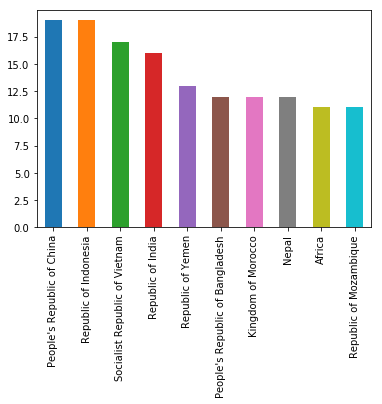

In [42]:
top_countries.plot(kind='bar')

### Obtain the top ten themes

In [43]:
Themes = json_normalize(json_data, 'mjtheme_namecode')
Themes.head()

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


In [44]:
Theme_counts = Themes['name'].value_counts()
Code_counts = Themes['code'].value_counts()
Top_themes =  Theme_counts.head(10)
Top_codes = Code_counts.head(10)
print(Top_themes)

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: name, dtype: int64


#### Replace the blank spaces with nan

In [45]:
Theme_counts_drop = json_normalize(json_data, 'mjtheme_namecode')
Theme_counts_drop['name'].replace('', np.nan, inplace=True)
print(Theme_counts_drop.head(10))

  code                                          name
0    8                             Human development
1   11                                           NaN
2    1                           Economic management
3    6         Social protection and risk management
4    5                         Trade and integration
5    2                      Public sector governance
6   11  Environment and natural resources management
7    6         Social protection and risk management
8    7                   Social dev/gender/inclusion
9    7                   Social dev/gender/inclusion


### Obtain top ten themes that have names and plot the results

In [46]:
Theme_counts_drop.dropna(subset=['name'], inplace=True)
Top_Themes_drop = Theme_counts_drop['name'].value_counts().head(10)
print(Top_Themes_drop)

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Economic management                              33
Name: name, dtype: int64


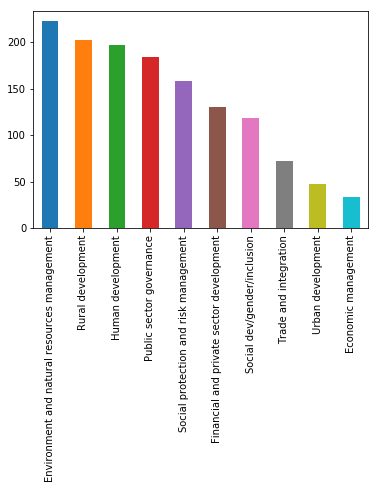

In [47]:
Top_Themes_drop.plot(kind='bar')